# L'entraînement

De nombreaux de problèmes de classification, regression, clustering, etc peuvent être realisés avec `scipy` ou `scikit-learn`, etc. Je vous recommande d'avoir un coup d'oeil.

Pour l'instant, on regarder une optimisation problem simple avec Tensorflow.

## Example: Classification Lineare

Les variables définées dans le graph tensorflow sont adjustées automatiquements pendant l'entraînement / l'optimisation.

### Signale linieare qui a été corrupté par du bruit Gaussian

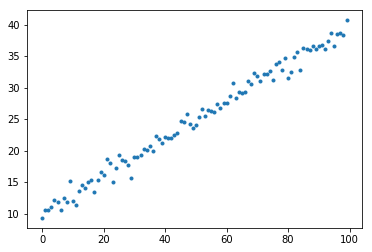

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(0,100, dtype=np.float32)
y = x * 0.3 + np.random.randn(100) + 10
plt.plot(x,y,'.')

### 1. Créer le graph

- x_input: valeurs X
- y_input: valeurs Y (les measurements)
- m_var: _variable_ de slope
- c_var: _variable_ de intercept
- y_output: valeurs Y _predicté_

In [3]:
import tensorflow as tf
import numpy as np

sess = tf.InteractiveSession()

x_input = tf.placeholder(tf.float32, [None,1])
y_input = tf.placeholder(tf.float32, [None,1])
m_var = tf.Variable(tf.zeros([1,1]))
c_var = tf.Variable(tf.zeros([1]))
y_output = tf.add(tf.matmul(x_input,m_var),c_var)




Erreurs accumulates: 689.82666015625


### 2. Créer la fonctionne à optimiser

On essai retrouver les valeurs de `m` et de `c` qui minimiser les erreurs entre y_output (x * m + c) et y_input.

In [7]:
loss = tf.reduce_mean(tf.square(y_output - y_input))

sess.run(tf.global_variables_initializer())
result = sess.run(loss, feed_dict = {x_input: x[:,np.newaxis], y_input: y[:,np.newaxis]})
print("Loss total: %f" % result)

Loss total: 689.826660


### 3. Entrainement

Minimiser le loss:

- Créer un optimiseur
- Démarrer l'optimiser en donnant des _batches_ de `x` et de `y`, différentes à chaque fois.
- Tensorflow calculera les nouvelles valeurs de `x` et de `y` en regardant les gradients de loss.
- Répéter jusqu'a le loss est assez petit.

In [8]:
learning_rate = 0.0001
training_epochs = 10000

optimiser = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

sess.run(tf.global_variables_initializer())

split_count = 10

for epoch in range(training_epochs):
    idx = np.arange(0,len(x),1)
    idx = np.random.permutation(idx)
    splits = np.split(idx, split_count)
    
    for split in splits:
        feed_dict = {x_input: x[split,np.newaxis], y_input: y[split,np.newaxis]}
        sess.run(optimiser,feed_dict=feed_dict)
        
    if epoch % 500 == 0:
        feed_dict = {x_input: x[:,np.newaxis], y_input: y[:,np.newaxis]}
        current_loss = sess.run(loss,feed_dict=feed_dict)
        print("Epoch: {}, loss: {:0.2f}, ".format(epoch, current_loss))

Epoch: 0, loss: 27.09, 
Epoch: 500, loss: 16.60, 
Epoch: 1000, loss: 10.45, 
Epoch: 1500, loss: 6.62, 
Epoch: 2000, loss: 4.37, 
Epoch: 2500, loss: 3.18, 
Epoch: 3000, loss: 2.21, 
Epoch: 3500, loss: 1.72, 
Epoch: 4000, loss: 1.42, 
Epoch: 4500, loss: 1.25, 
Epoch: 5000, loss: 1.14, 
Epoch: 5500, loss: 1.19, 
Epoch: 6000, loss: 1.07, 
Epoch: 6500, loss: 1.02, 
Epoch: 7000, loss: 1.16, 
Epoch: 7500, loss: 1.03, 
Epoch: 8000, loss: 1.03, 
Epoch: 8500, loss: 0.98, 
Epoch: 9000, loss: 1.02, 
Epoch: 9500, loss: 0.98, 


### 4. Obtenir les nouvelles valeurs

In [9]:
current_m = sess.run(m_var,feed_dict=feed_dict)
current_c = sess.run(c_var,feed_dict=feed_dict)
print(current_m)
print(current_c)

[[ 0.29921871]]
[ 10.07133102]


En comparison avec `scipy`:

In [11]:
import scipy.stats

scipy_m, scipy_c, _, _, _ = scipy.stats.linregress(x,y)
print(scipy_m)
print(scipy_c)

0.296538232525
10.1322528086
